## Exploring the review scores data
There's a lot going on in this dataset. This notebook follows my intuitions in an attempt to get a sense of the data.

In [19]:
library(tidyverse)
library(ggplot2)
library(RSQLite)

# connect to the sqlite file
con = dbConnect(SQLite(), dbname="../data/database.sqlite")# get a list of all tables
alltables = dbListTables(con)
# get the populationtable as a data.frame
df_reviews = dbGetQuery( con,'SELECT * FROM reviews' )
df_genres = dbGetQuery( con,'SELECT * FROM genres' )
# Close connection
dbDisconnect(con)           

## Score and Best New Music distributions¶

mean(score),mean(best_new_music),sd(score),sd(best_new_music)
7.005779,0.0512695,1.293675,0.2205529


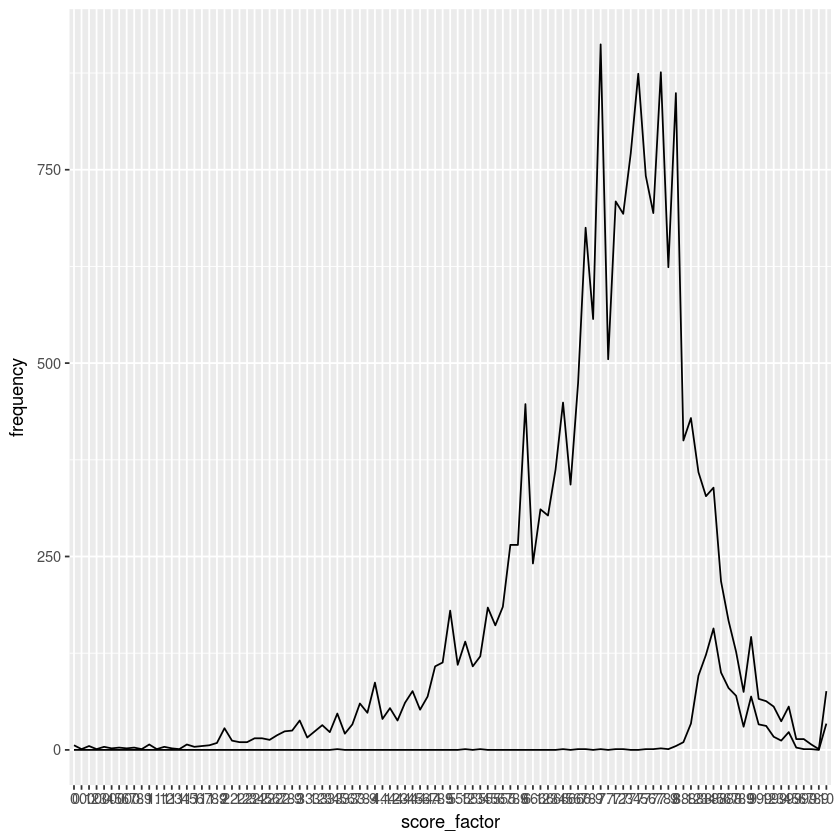

In [94]:
# mean and std of the score for best new music 
df_reviews %>%
    summarise(mean(score), mean(best_new_music), sd(score), sd(best_new_music))

# plot frequency in ggplot for best_new_music vs. all reviews 
df_reviews %>%
    group_by(score_factor) %>%
    summarise(best_new_music = sum(best_new_music), all_review = n()) %>%
    gather(key=type, value = frequency, -score_factor) %>%
    ggplot(aes(x=score_factor, y=frequency, group = type)) + geom_line() + scale_x_discrete(labels = abbreviate)

In [99]:
df_reviews %>% 
    filter(best_new_music == 0 &  score == 10) %>%
    head(2)

reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,score_factor
22485,blood on the tracks,bob dylan,http://pitchfork.com/reviews/albums/22485-blood-on-the-tracks/,10,0,jesse jarnow,contributor,2016-10-30,6,30,10,2016,10
22061,another green world,brian eno,http://pitchfork.com/reviews/albums/22061-another-green-world/,10,0,mike powell,contributor,2016-09-18,6,18,9,2016,10


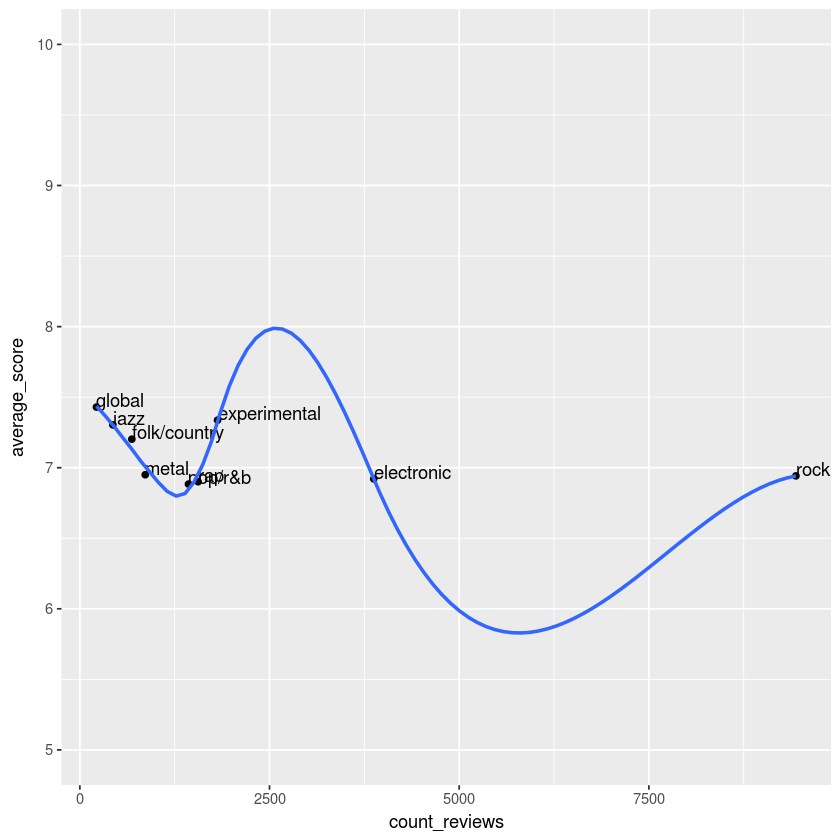

In [140]:
df_reviews %>% 
    left_join(df_genres, by = "reviewid") %>%
    group_by(genre) %>%
    summarise(average_score = mean(score), count_reviews = n()) %>%
    drop_na() %>%
    ggplot(aes(count_reviews, average_score)) + geom_point() + geom_text(aes(label=genre),hjust=0, vjust=0) + 
    geom_smooth(method='loess', se = F) + 
    scale_y_continuous(limits = c(5,10))

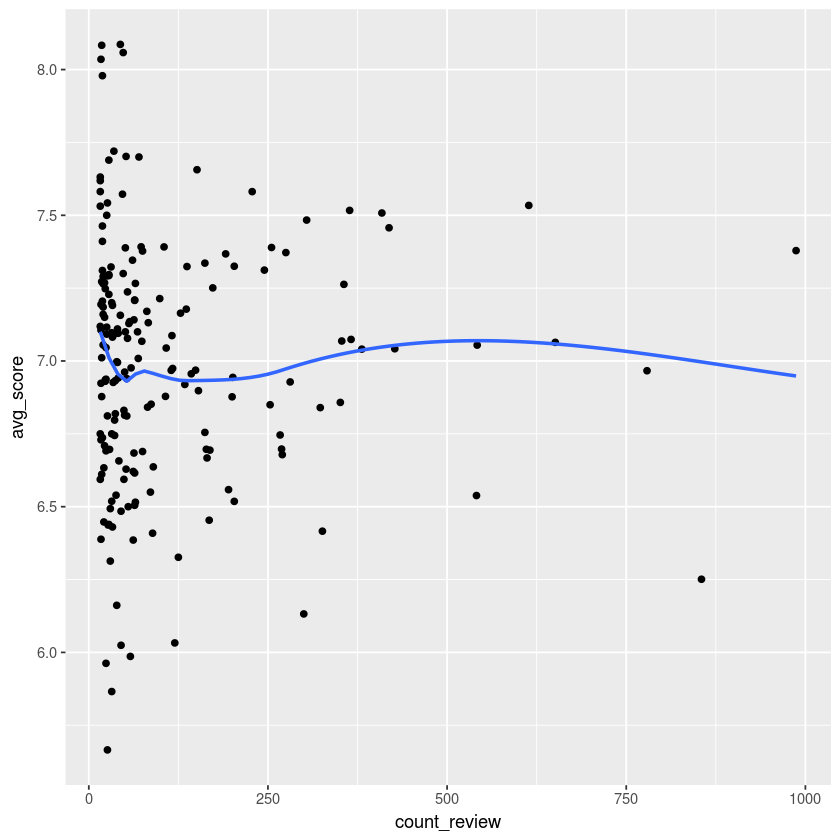

In [148]:
df_reviews %>% 
    left_join(df_genres, by = "reviewid") %>%
    group_by(author) %>%
    summarise(avg_score = mean(score), count_review = n()) %>%
    filter(count_review > 15) %>%
    ggplot(aes(count_review, avg_score)) + geom_point()  + 
    geom_smooth(method='loess', se = F)